**<u>Analyzing A Baby Names Dataset In R - A Graphical Approach</u>**

Hi there. This page looks at the `babynames` dataset but from a graphical approach. 

**<u>Table Of Contents</u>**


* The babynames Dataset

* Preparing The Data For Graphing

* Finding The Top 20 Baby Names

* The 20 Most Popular Male Baby Names

* The 20 Most Popular Female Baby Names

* Notes & References

**<u>The babynames Dataset</u>**

There is a large dataset which contains babynames and their counts. It is called babynames in the babynames library in R. The R documentation screenshot image below shows some details about the data. (I do not know what SSA means.)



In R, load the babynames, ggplot2 and data.table packages using the `library()` function.

In [3]:
# Sideways Bar Graph
# Analyzing Baby Names Part 2:
# A Bar Graph Approach


library(babynames) # Baby Names dataset:
library(ggplot2) # Data visualization
library(data.table) # For data wrangling and manipulation

Warning message:
"package 'babynames' was built under R version 3.4.2"

In the babynames library, the dataset babynames contains the most popular baby names.

In [4]:
# Save the babynames data into baby_data:

baby_data <- data.table(babynames)

# Preview the data:

head(baby_data)

tail(baby_data)



year,sex,name,n,prop
1880,F,Mary,7065,0.07238433
1880,F,Anna,2604,0.02667923
1880,F,Emma,2003,0.02052170
1880,F,Elizabeth,1939,0.01986599
1880,F,Minnie,1746,0.01788861
1880,F,Margaret,1578,0.01616737


year,sex,name,n,prop
2015,M,Zyah,5,2.466855e-06
2015,M,Zykell,5,2.466855e-06
2015,M,Zyking,5,2.466855e-06
2015,M,Zykir,5,2.466855e-06
2015,M,Zyrus,5,2.466855e-06
2015,M,Zyus,5,2.466855e-06


It appears that the dataset has data on baby names from 1880 to 2014. (It is uncertain if this data is 100% accurate. We go with what we have.)

The structure of the dataset can be examined using `str()`.

In [5]:
# Structure of data:

str(baby_data)

Classes 'data.table' and 'data.frame':	1858689 obs. of  5 variables:
 $ year: num  1880 1880 1880 1880 1880 1880 1880 1880 1880 1880 ...
 $ sex : chr  "F" "F" "F" "F" ...
 $ name: chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ n   : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ prop: num  0.0724 0.0267 0.0205 0.0199 0.0179 ...
 - attr(*, ".internal.selfref")=<externalptr> 


The output from `str(baby_data)` tells us that this large dataset has 1,825,433 rows and 5 columns.

**<u>Preparing The Data For Graphing</u>**

The current column names are not the best. The column names can be changed by using `colnames()` in R.

In [6]:
# Change column names:

colnames(baby_data) <- c("Year", "Sex", "Name", "Count", "Proportion")

Using the features from the `data.table` library in R, the baby names in the dataset are sorted by Name and their Counts are added by name.

The line `sorted_names[order(-Name.Count)]` will then order the name and its count in descending order (most popular to least popular).

In [7]:
## Finding The Top 20 Baby Names:

# Sort names from most popular to least popular (adds duplicates too):

sorted_names <- baby_data[ , .(Name.Count = sum(Count)), by = Name]
sorted_names <- sorted_names[order(-Name.Count)]

# Preview: 
head(sorted_names, n = 20)
 


Name,Name.Count
James,5144205
John,5117331
Robert,4823167
Michael,4345569
Mary,4133216
William,4087556
David,3602623
Joseph,2592388
Richard,2567700
Charles,2383998


Since I want the the 20 most popular baby names, I take the 20 rows from sorted_names and name it a new variable.

In [9]:
top_twenty_babynames <- sorted_names[1:20, ]

# Preview: 
top_twenty_babynames


Name,Name.Count
James,5144205
John,5117331
Robert,4823167
Michael,4345569
Mary,4133216
William,4087556
David,3602623
Joseph,2592388
Richard,2567700
Charles,2383998


**<u>Finding The Top 20 Baby Names</u>**

<u>Some Initial Bar Graphs</u>

The data is now formatted for creating bar graphs using ggplot2. Here is a first attempt at a bar graph.

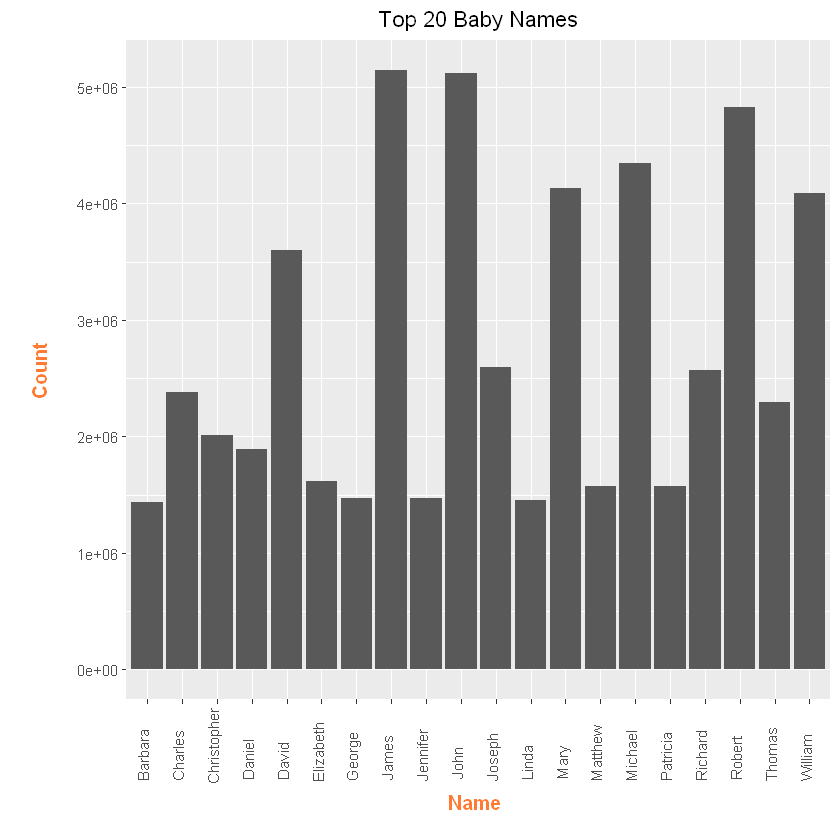

In [10]:
# Ggplot Bar Graph:

ggplot(top_twenty_babynames, aes(x = Name, y = Name.Count)) + 
  geom_bar(stat = "identity") +
  labs(x = "Name \n", y = "\n Count \n", title = "Top 20 Baby Names") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
        axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
        axis.text.x = element_text(angle = 90, vjust = 0.1, hjust = 0.1),
        legend.title = element_text(face="bold", size = 10))

This bar graph looks okay for the most part. However, the counts are in scientific notation and the names are somewhat hard to read as you may need to tilt your head.



This next attempt at a bar graph that I tried has the bars sideways.

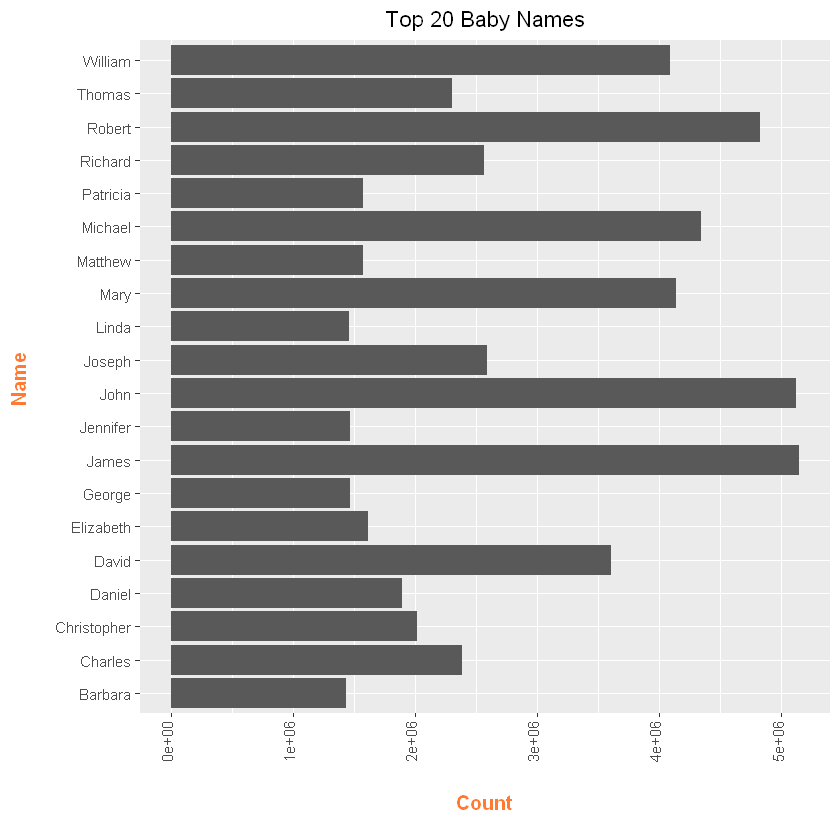

In [11]:
# Ggplot Sideways Bar Graph:

ggplot(top_twenty_babynames, aes(x = Name, y = Name.Count)) + 
  geom_bar(stat = "identity") + coord_flip() +
  labs(x = "Name \n", y = "\n Count \n", title = "Top 20 Baby Names") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
        axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
        axis.text.x = element_text(angle = 90, vjust = 0.1, hjust = 0.1),
        legend.title = element_text(face="bold", size = 10))

This bar graph looks a little bit better but the counts are off and could use some scaling.

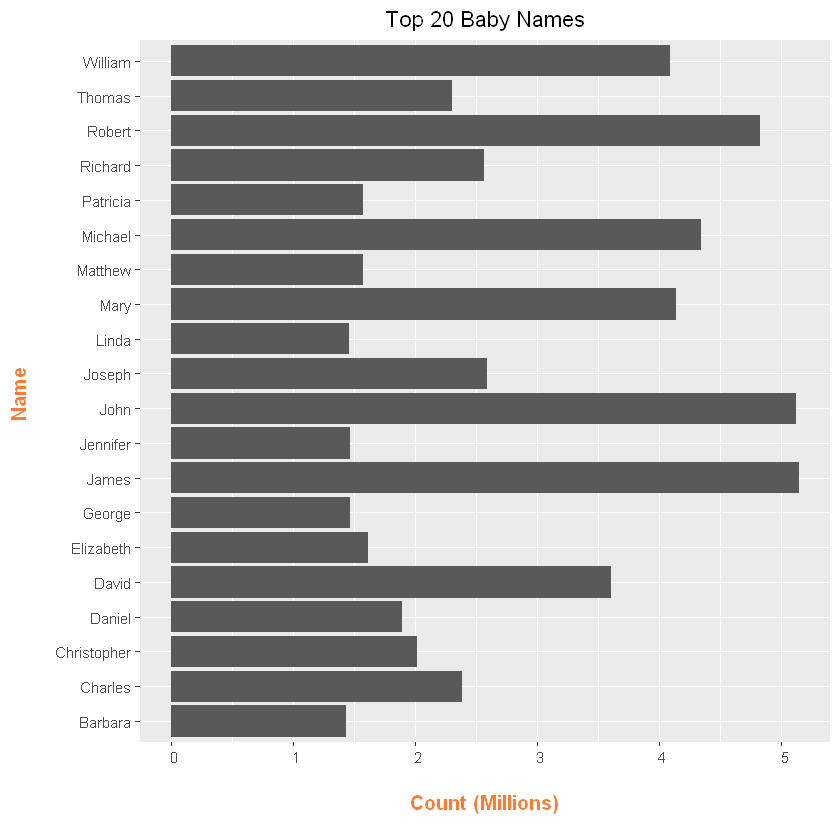

In [12]:
# Ggplot Sideways Bar Graph (Scaled):

ggplot(top_twenty_babynames, aes(x = Name, y = Name.Count/1000000)) + 
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks=seq(0, 6, 1)) +
  labs(x = "Name \n", y = "\n Count (Millions) \n", title = "Top 20 Baby Names") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
        axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
        axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
        legend.title = element_text(face="bold", size = 10))

<u>An Updated Version Of The Bar Graph</u>

This updated version of the bar graph has the bars sorted from most popular baby name to the 20th most popular baby name. These bars also have labeled counts which eliminates the guess work. Here is the code and output for it.

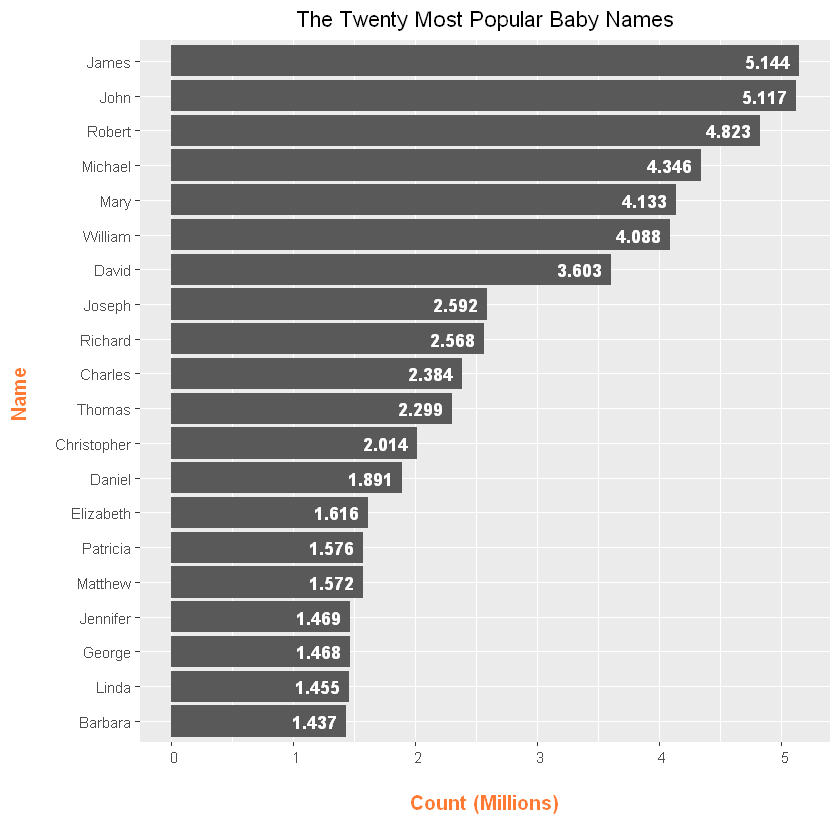

In [13]:
# We have the sorted top 20 baby names but ggplot would not recognize this 
# ordering.
# To have ggplot recognize this ordering, we have these 20 names
# as factors in the order of the most popular female
# name to the 20th most popular female name
# http://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html

top_twenty_babynames$Name <- factor(top_twenty_babynames$Name, 
                           levels = top_twenty_babynames$Name[order(top_twenty_babynames$Name.Count)]) 

# Ggplot Sideways Bar Graph (Fixed & Sorted):

ggplot(top_twenty_babynames, aes(x = Name, y = Name.Count/1000000)) + 
 geom_bar(stat = "identity") + coord_flip() +
 scale_y_continuous(breaks=seq(0, 6, 1)) + 
 geom_text(aes(label = round(Name.Count/1000000, 3)), hjust = 1.2, colour = "white", fontface = "bold") +
 labs(x = "Name \n", y = "\n Count (Millions) \n", title = "The Twenty Most Popular Baby Names") + 
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
 axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
 axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
 legend.title = element_text(face="bold", size = 10))

**<u>The 20 Most Popular Male Baby Names</u>**

We can also look at the most popular male baby names. The code uses features from data.table and it is quite similar to the code above. Here is the code and output.

In [15]:
### Male Baby Names:

male_babynames <- baby_data[Sex == "M" , .(Name.Count = sum(Count)), by = Name][order(-Name.Count)]

head(male_babynames , n = 20)
 

Name,Name.Count
James,5120990
John,5095674
Robert,4803068
Michael,4323928
William,4071645
David,3589754
Joseph,2581785
Richard,2558165
Charles,2371621
Thomas,2290364


In [16]:
# Order male baby names in descending order by Count:
# Reference: http://www.statmethods.net/management/sorting.html

male_babynames <- male_babynames[order(-Name.Count), ]

head(male_babynames, n = 20)

Name,Name.Count
James,5120990
John,5095674
Robert,4803068
Michael,4323928
William,4071645
David,3589754
Joseph,2581785
Richard,2558165
Charles,2371621
Thomas,2290364


In [18]:
# Top 20 Male Baby Names:

toptwenty_m <- male_babynames[1:20, ]

toptwenty_m


Name,Name.Count
James,5120990
John,5095674
Robert,4803068
Michael,4323928
William,4071645
David,3589754
Joseph,2581785
Richard,2558165
Charles,2371621
Thomas,2290364


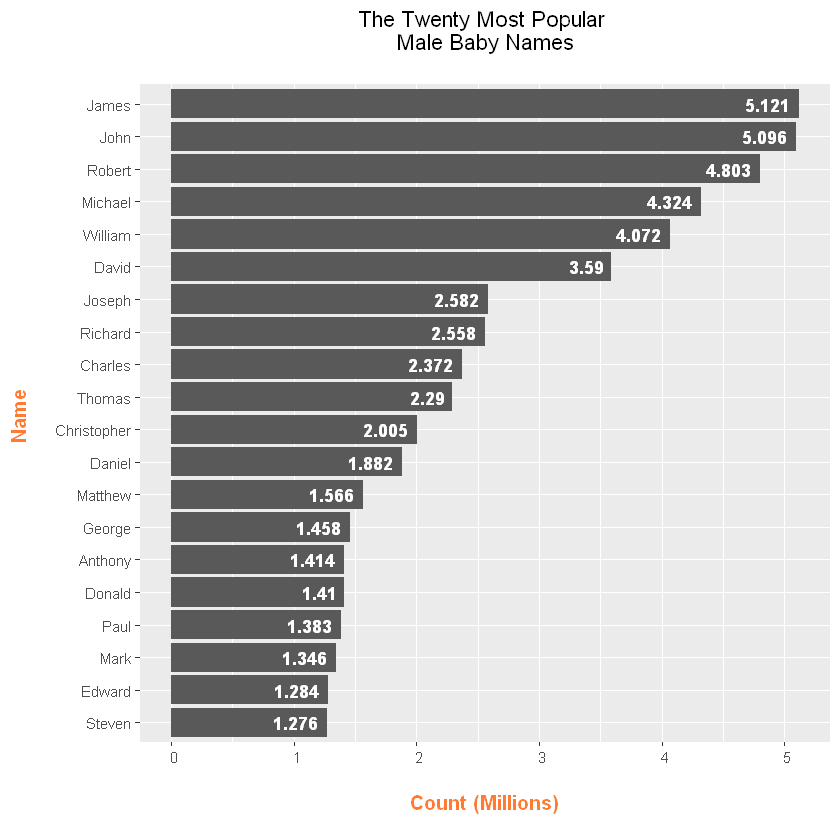

In [19]:
toptwenty_m$Name <- factor(toptwenty_m$Name, 
                    levels = toptwenty_m$Name[order(toptwenty_m$Name.Count)])

# Ggplot Sideways Bar Graph (Fixed & Sorted):

ggplot(toptwenty_m, aes(x = Name, y = Name.Count/1000000)) + 
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks=seq(0, 6, 1)) + 
  geom_text(aes(label = round(Name.Count/1000000, 3)), hjust = 1.2, colour = "white", fontface = "bold") +
  labs(x = "Name \n", y = "\n Count (Millions) \n", 
       title = "The Twenty Most Popular \n Male Baby Names \n") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
        axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
        axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
        legend.title = element_text(face="bold", size = 10))

From 1880 to 2014, James is the most popular male baby name (and baby name of all time in this time frame).

**<u>The 20 Most Popular Female Baby Names</u>**

Here is the code and output for the 20 most popular female baby names from 1880 to 2014.

In [20]:
# Getting the Top 20 Female Baby Names:

female_babynames <- baby_data[Sex == "F" , .(Name.Count = sum(Count)), by = Name][order(-Name.Count)]

head(female_babynames , n = 20)


Name,Name.Count
Mary,4118058
Elizabeth,1610948
Patricia,1570954
Jennifer,1464067
Linda,1451331
Barbara,1433339
Margaret,1242141
Susan,1120810
Dorothy,1106106
Sarah,1065265


In [22]:
# Order female baby names in descending order by Count:
# Reference: http://www.statmethods.net/management/sorting.html

female_babynames <- female_babynames[order(-Name.Count), ]

head(female_babynames, n = 20)

Name,Name.Count
Mary,4118058
Elizabeth,1610948
Patricia,1570954
Jennifer,1464067
Linda,1451331
Barbara,1433339
Margaret,1242141
Susan,1120810
Dorothy,1106106
Sarah,1065265


Name,Name.Count
Mary,4118058
Elizabeth,1610948
Patricia,1570954
Jennifer,1464067
Linda,1451331
Barbara,1433339
Margaret,1242141
Susan,1120810
Dorothy,1106106
Sarah,1065265


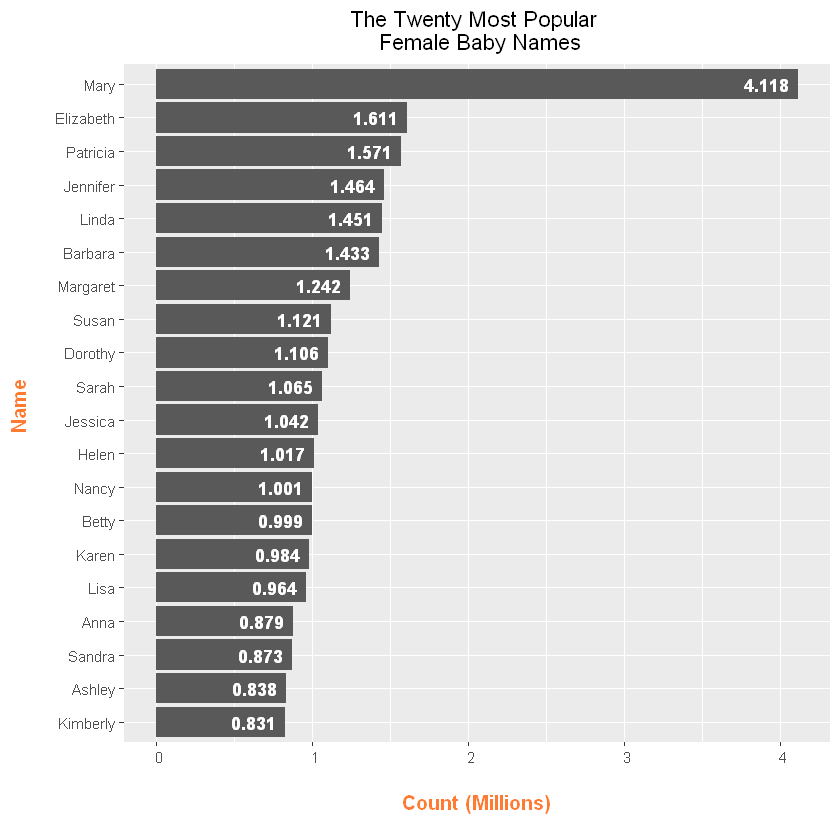

In [23]:
# Top 20 Female Baby Names:

toptwenty_f <- female_babynames[1:20, ]
 
toptwenty_f

 toptwenty_f$Name <- factor(toptwenty_f$Name, 
                   levels = toptwenty_f$Name[order(toptwenty_f$Name.Count)])
 

# Ggplot Sideways Bar Graph (Fixed & Sorted):
 
ggplot(toptwenty_f, aes(x = Name, y = Name.Count/1000000)) + 
   geom_bar(stat = "identity") + coord_flip() +
   scale_y_continuous(breaks=seq(0, 6, 1)) + 
   geom_text(aes(label = round(Name.Count/1000000, 3)), hjust = 1.2, colour = "white", fontface = "bold") +
   labs(x = "Name \n", y = "\n Count (Millions) \n", 
        title = "The Twenty Most Popular \n Female Baby Names") + 
   theme(plot.title = element_text(hjust = 0.5), 
         axis.title.x = element_text(face="bold", colour="#FF7A33", size = 12, vjust = 1),
         axis.title.y = element_text(face="bold", colour="#FF7A33", size = 12),
         axis.text.x = element_text(vjust = 0.1, hjust = 0.1),
         legend.title = element_text(face="bold", size = 10))

Mary is overwhelming the most popular female baby name from 1880 to 2014.

**<u>Notes And References</u>**

As large as this dataset is, one should be wary of biases in data. It is unknown how the data was collected. Which countries, regions were involved in this sampling of this dataset?

It is unknown if cases such Ana and Anna are considered the same? Likewise with cases such as Liz, Elizabeth, Liza.

The time frame is from 1880 to 2014. One could look into a more recent time window such as 2000 to 2014.

* R Graphics Cookbook by Winston Chang (2012)
* http://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html
* http://www.statmethods.net/management/sorting.html
* https://s3.amazonaws.com/assets.datacamp.com/img/blog/data+table+cheat+sheet.pdf